# ACF and PACF: AR & MA Simulation

## 1. Moving average

### 1.1 Stationary process

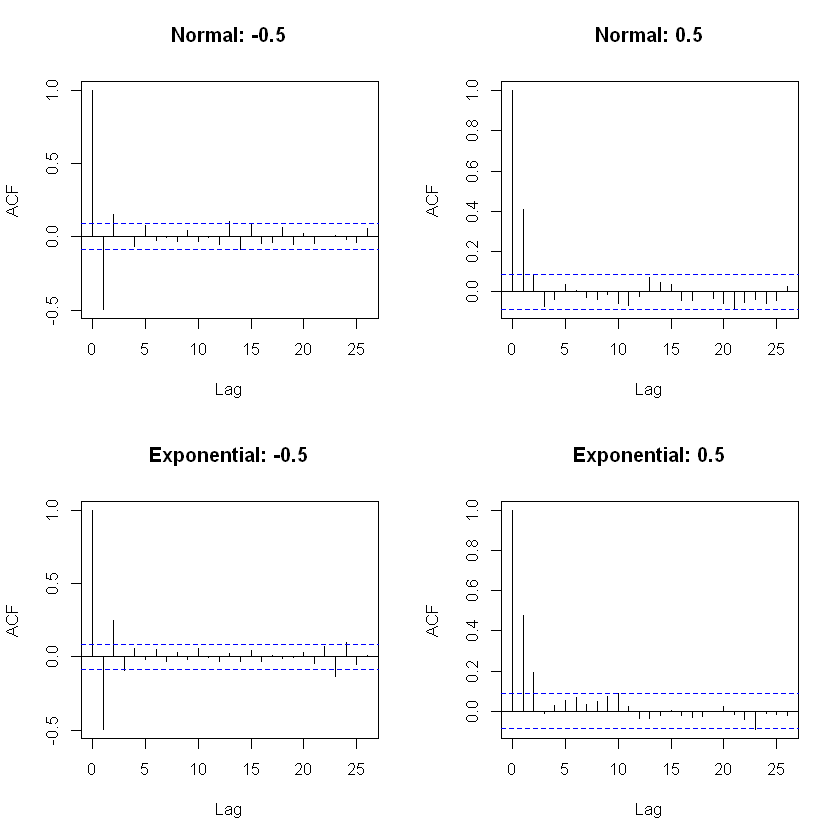

In [3]:
## Simulate White Noise
w1=rnorm(502)
w2=rexp(502)-1

##set coefficient
a=c(1,-.5,.2) 
a1=c(1,.5,.2)

##1:Normal: -0.5
ma2.11=filter(w1,filter=a,side=1)
ma2.11=ma2.11[3:502]
##2:Normal: 0.5
ma2.12=filter(w1,filter=a1,side=1)
ma2.12=ma2.12[3:502]

##3:Exponential: -0.5
ma2.21=filter(w2,filter=a,side=1)
ma2.21=ma2.21[3:502]
##4:Exponential: 0.5
ma2.22=filter(w2,filter=a1,side=1)
ma2.22=ma2.22[3:502]

#ACF plot
par(mfrow=c(2,2))
acf(ts(ma2.11), main='Normal: -0.5')
acf(ts(ma2.12), main='Normal: 0.5')
acf(ts(ma2.21), main='Exponential: -0.5')
acf(ts(ma2.22), main='Exponential: 0.5')

From ACF plot indicate that the order of MA process is 2: **MA(2)** process

### 1.2 Non-staionary process

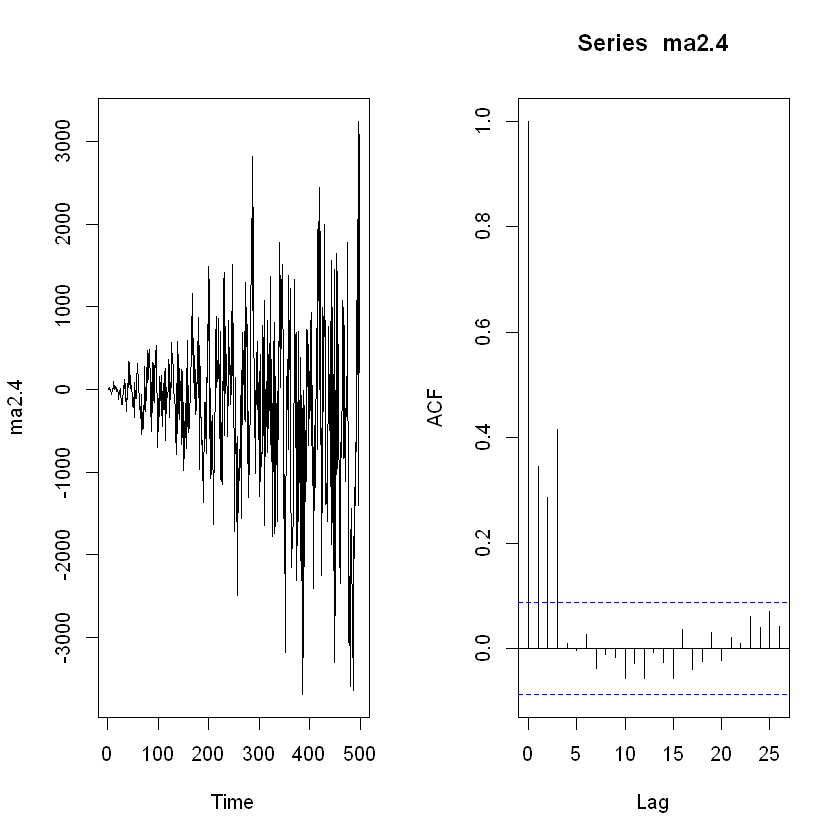

In [5]:
##simulate white noise
w1=rnorm(502)
##set coefficients
a4=c(1,.2,.8,1.2)
## Simulate MA(3) with non-stationary noise
ma2.4=filter(w1*2*(1:502)+0.5,filter=a4,side=1)
ma2.4=ma2.4[4:502]
par(mfrow=c(1,2))
ts.plot(ma2.4)
acf(ma2.4)

From the ACF plot we can observe that the order of the simulated MA process is 3. Even in the non-stationary process the property of the quto correlation function is maintained.

## 2. Autoregressive process

In [7]:
w2=rnorm(1500)
## Stationary AR(2)
a2=c(1.8,-0.9)
ar2.s=filter(w2,filter=a2,method='recursive')
ar2.s=ar2.s[1251:1500]
## Non-stationary AR(2)
a2=c(0.8,0.2)
ar2.n=filter(w2,filter=a2,method='recursive')
ar2.n=ar2.n[1251:1500]

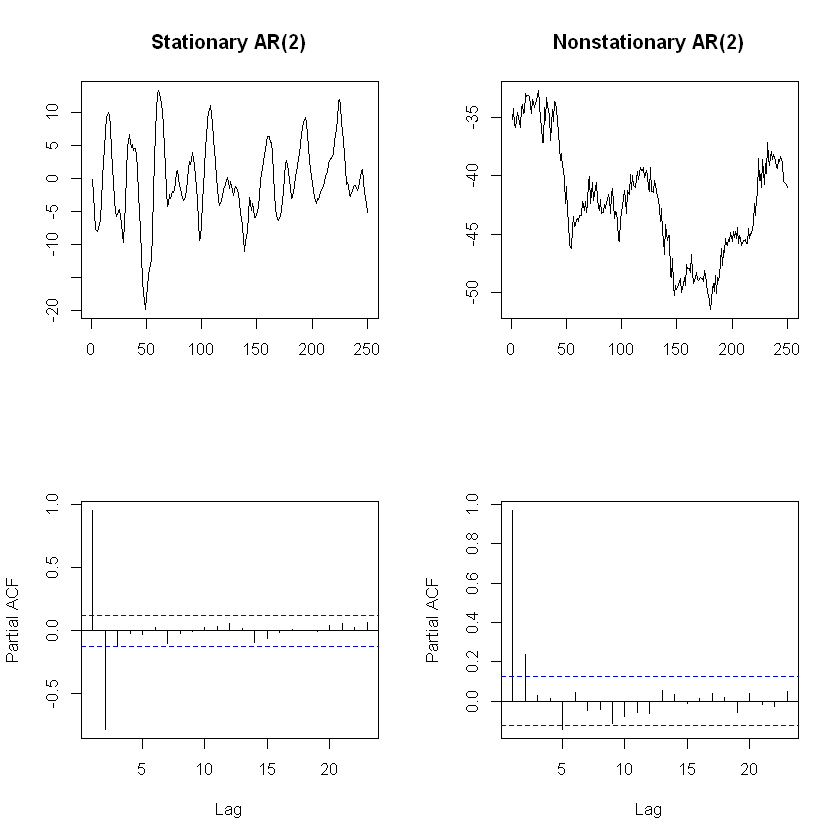

In [8]:
##Compare PACF
par(mfrow=c(2,2))
ts.plot(ar2.s, main="Stationary AR(2)",ylab="",xlab="")
ts.plot(ar2.n, main="Nonstationary AR(2)",ylab="",xlab="")
pacf(ar2.s,main="")
pacf(ar2.n,main="")

**Comment:**

The second equation is not staionary is de to the fact that one solution to this eualtion is on the unit circle (that is equal to 1). While the other is not so it's stationary.

Looking at the PACF plot we can tell that the oder for the both plot are 2)

*note that the PACF plot start with 1 not 0 (as ACF plot start with o)*

# 3. ARMA process

We use `arima.sim` to simulate ARMA processes. Assuming the WN is Gaussian, otherwise we need to speify through an option of the function `rand.gen`. Note that `sd` here are the sandard error for the white noise.

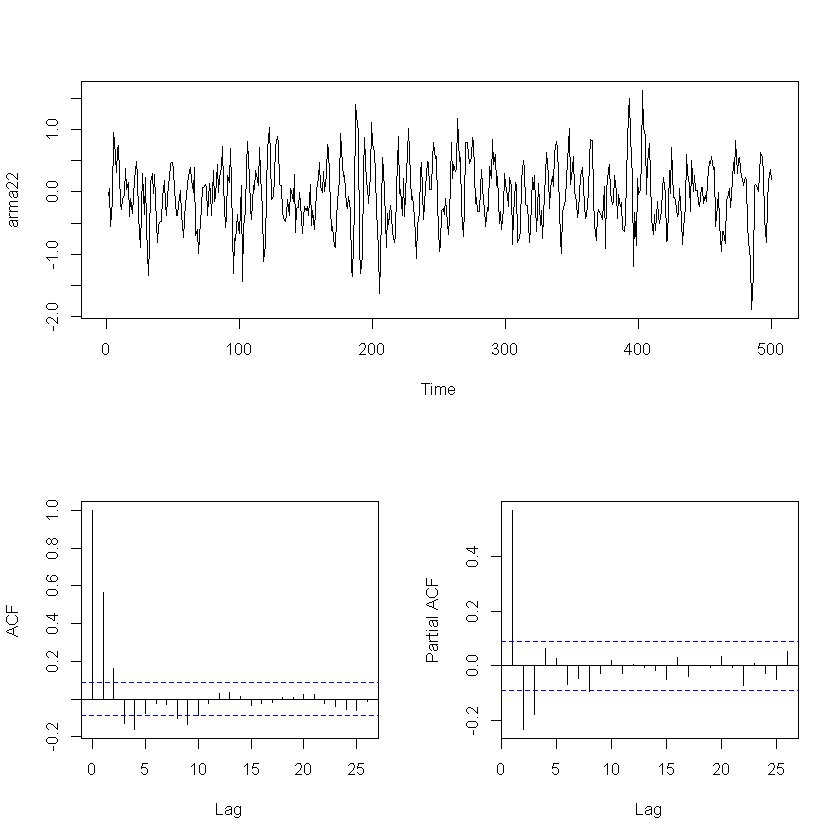

In [11]:
## Stationary ARMA(2,2)

arma22=arima.sim(n=500, list(ar=c(0.88,-0.49),ma=c(-0.23,0.25)),sd=sqrt(0.18))
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))
ts.plot(arma22)
acf(arma22,main='')
pacf(arma22,main='')

Note that here we might think the order of the MA model is 4 (q=4) and the order of the AR model is 3 (p=3) makes the ARMA model ARMA(3,4). However we stimulate ARMA(2,2) that is we cannot use the ACF and PACF plots to identify p and q in an ARMA process.